In [1]:
print("This Code For Runo Test")

This Code For Runo Test


In [2]:
!pip install matplotlib
!pip install pandas
!pip install numpy

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv("Runo Call CRM.csv", encoding='unicode_escape')
print(df.head(10))

                Customer Id               Name         Phone  \
0                       NaN            Unknown  918588096342   
1                       NaN            Unknown  919891163874   
2                       NaN            Unknown  918448225799   
3  60c9dc5cf8c5d7000819db43  MR. PRINCE  GUPTA  919170775457   
4  6569e83cbee5fed5b380bc49     MRS. INDU GAUR  919871804943   
5                       NaN            Unknown  919170775457   
6  651c02d7ec5be15c87369cd0              RAJIV  919873779254   
7                       NaN            Unknown  918929665090   
8  643ccf63f15393787c90b060         CHHEDA LAL  919456694453   
9                       NaN            Unknown  919540048961   

    Call Start Date Call Type    Call Tag  Duration (in Sec)  Duration  \
0  01-12-2024 09:15  outgoing    answered               40.0  00:00:40   
1  01-12-2024 09:26  outgoing    answered               23.0  00:00:23   
2  01-12-2024 09:31  incoming    answered               54.0  00:00:54   

In [6]:
Caller_Names = df['Caller Name'].unique()

# Print the unique values
print("All Caller Name: ")
print(Caller_Names)

All Caller Name: 
['Manisha CRE' 'Anamika CRM' 'Shivani cre' 'Anjali' 'Sonam CRE'
 'Sajida CRE' 'Pooja CRE' 'Dipeeka CRE' 'Hema CRE' 'Riya']


In [7]:
caller_and_name = {}

for call_name in Caller_Names:
    count = df[df["Caller Name"] == call_name].shape[0]
    caller_and_name[call_name] = count

print(caller_and_name)


{'Manisha CRE': 570, 'Anamika CRM': 400, 'Shivani cre': 2223, 'Anjali': 713, 'Sonam CRE': 2313, 'Sajida CRE': 2547, 'Pooja CRE': 653, 'Dipeeka CRE': 801, 'Hema CRE': 1650, 'Riya': 4}


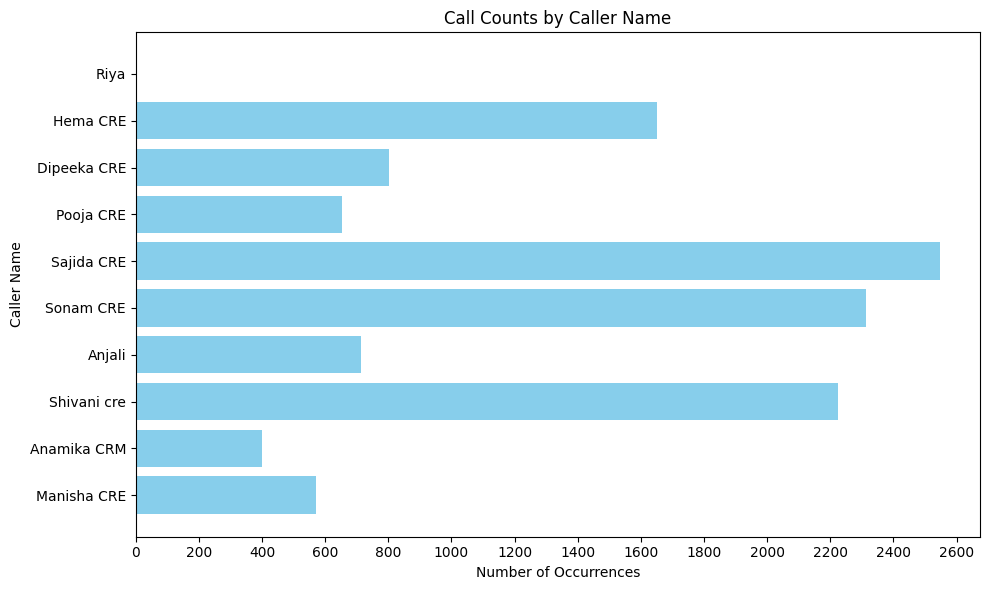

In [8]:
names = list(caller_and_name.keys())
counts = list(caller_and_name.values())

plt.figure(figsize=(10, 6))
plt.barh(names, counts, color='skyblue') 

plt.xlabel('Number of Occurrences')
plt.ylabel('Caller Name')
plt.title('Call Counts by Caller Name')

plt.xticks(range(0, max(counts) + 200, 200)) 

plt.tight_layout() 
plt.show()


In [13]:
import pandas as pd

# Function to get missed calls and subsequent outgoing calls in table format
def get_missed_and_follow_up(caller_name):
    # Filter for missed calls by the given caller
    missed_calls = df[(df['Caller Name'] == caller_name) & (df['Call Type'] == 'missed')]
    
    missed_phone_numbers = missed_calls['Phone'].tolist()
    
    result = []
    
    for number in missed_phone_numbers:
        # Find if there is an outgoing call after the missed call to the same number
        subsequent_calls = df[(df['Phone'] == number) & (df['Call Type'] == 'outgoing') & 
                              (df['Call Start Date'] < missed_calls.loc[missed_calls['Phone'] == number, 'Call Start Date'].values[0])]
        
        if not subsequent_calls.empty:
            follow_up_status = "Followed by an outgoing call later"
        else:
            follow_up_status = "No follow-up outgoing call"
        
        # Adding row to the result
        result.append({
            'Phone Number': number,
            'Missed Call Time': missed_calls.loc[missed_calls['Phone'] == number, 'Call Start Date'].values[0],
            'Follow-Up Status': follow_up_status
        })
    
    # Convert result into a DataFrame for table-like format
    result_df = pd.DataFrame(result)
    return result_df

# Example usage
caller_name = "Manisha CRE"
missed_and_follow_up_df = get_missed_and_follow_up(caller_name)

# Display the result in a table
print(missed_and_follow_up_df)


    Phone Number  Missed Call Time                    Follow-Up Status
0   919599438311  01-12-2024 16:30  Followed by an outgoing call later
1   918889591811  03-12-2024 12:38  Followed by an outgoing call later
2   919081218484  03-12-2024 13:05  Followed by an outgoing call later
3   917999954575  09-12-2024 18:55          No follow-up outgoing call
4   919717136199  10-12-2024 10:06          No follow-up outgoing call
5   911408853472  10-12-2024 12:11          No follow-up outgoing call
6   911408364074  10-12-2024 12:56          No follow-up outgoing call
7   919717341839  11-12-2024 07:56  Followed by an outgoing call later
8   919717341839  11-12-2024 07:56  Followed by an outgoing call later
9   919650994692  11-12-2024 13:04          No follow-up outgoing call
10  919958085019  13-12-2024 10:30  Followed by an outgoing call later
11  919219033055  20-12-2024 12:35          No follow-up outgoing call
12  917903036707  20-12-2024 15:12  Followed by an outgoing call later
